In [44]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.cross_validation import cross_val_predict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import os
# plot feature importance using built-in function
from numpy import loadtxt
from matplotlib import pyplot
%matplotlib inline
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

In [45]:
os.chdir("C://Users//rumer//Desktop//8May2017//DataSet")

In [47]:
df=pd.read_csv("w2.csv")
df.columns

Index([u'anon_screen_name', u'QuzAttmptAvg1', u'QuzCount1', u'QuzAvSco1',
       u'QuzLagMean1', u'LecLag1', u'LecCount1', u'VidActCount1', u'eff1',
       u'QuzAttmptAvg2', u'QuzCount2', u'QuzAvSco2', u'QuzLagMean2',
       u'LecLag2', u'LecCount2', u'VidActCount2', u'eff2', u'Finalgrade',
       u'FinalScore', u'Class', u'EngStatus'],
      dtype='object')

In [48]:
df.head()

,anon_screen_name,QuzAttmptAvg1,QuzCount1,QuzAvSco1,QuzLagMean1,LecLag1,LecCount1,VidActCount1,eff1,QuzAttmptAvg2,...,QuzAvSco2,QuzLagMean2,LecLag2,LecCount2,VidActCount2,eff2,Finalgrade,FinalScore,Class,EngStatus
0,012113d6241059a1c191068a899c0396fa3f3ee9,1.500000,25.0,93.750000,540.00,0,0.0,5,0,0,...,0,0,0,0,0,0,0.00,Fail,BelowAverage,Time<10Mins
1,01494288a5ff7efce6e88f56eed694345c5d4bff,0.000000,0.0,0.000000,0.00,14423340,12.5,4,0,2,...,100,35684460,0,0,0,0,0.05,Fail,BelowAverage,Time<10Mins
2,02a0c112546f7f05eadaf34efb3548d8702a481f,1.142857,87.5,88.095714,18787782.86,247320,25.0,3,623,0,...,0,0,0,0,0,1,0.00,Fail,BelowAverage,Time<10Mins
3,030541f53670bc50fae8964a78cec71bcfd069b0,0.000000,0.0,0.000000,0.00,0,0.0,29,0,0,...,0,0,0,0,3,116,0.36,Fail,BelowAverage,Time<10Mins
4,04badfbd3e9dfb420065a6ea7cad05db20fa2a5b,0.000000,0.0,0.000000,0.00,0,0.0,9,0,0,...,0,0,0,0,0,0,0.09,Fail,BelowAverage,Time<10Mins


In [49]:
df.drop('Finalgrade',1, inplace=True)
df.drop('eff2',1, inplace=True)
df.drop('FinalScore',1, inplace=True)
df.drop('EngStatus',1, inplace=True)

In [51]:
df['Class'] = df['Class'].map({'AboveAvgEngaged': 'Engaged', 'AverageEngaged': 'Engaged','BelowAverage':'NotEngaged'})

In [52]:
df.columns

Index([u'anon_screen_name', u'QuzAttmptAvg1', u'QuzCount1', u'QuzAvSco1',
       u'QuzLagMean1', u'LecLag1', u'LecCount1', u'VidActCount1', u'eff1',
       u'QuzAttmptAvg2', u'QuzCount2', u'QuzAvSco2', u'QuzLagMean2',
       u'LecLag2', u'LecCount2', u'VidActCount2', u'Class'],
      dtype='object')

In [53]:
array=df.values
X = array[:,1:16]
y = array[:,16]


In [64]:
#from sklearn.preprocessing import LabelBinarizer
#lb = LabelBinarizer()
#y = np.array([number[0] for number in lb.fit_transform(y)])


In [54]:
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
X=normalizedX

In [55]:
validation_size = 0.20
print("Number of records", len(X))
print("Class Distribuition", df.groupby('Class').size())
#plt.plot(df['ActCount-1'])


('Number of records', 10590)
('Class Distribuition', Class
Engaged       4203
NotEngaged    6387
dtype: int64)


In [56]:
seed = 7
X_train, X_test, Y_train, y_test = cross_validation.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [57]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
models=[]
models.append(('LR',LogisticRegression()))
models.append(('DTree', DecisionTreeClassifier()))
#models.append(('LDA',LinearDiscriminaantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
#Evaluate each model
results=[]
names=[]
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)
    # Compare Algorithms

LR: 66.194504 (0.032071)
DTree: 76.888296 (0.017191)
KNN: 77.631791 (0.019480)
NB: 39.565670 (0.014447)
SVM: 64.943293 (0.014335)


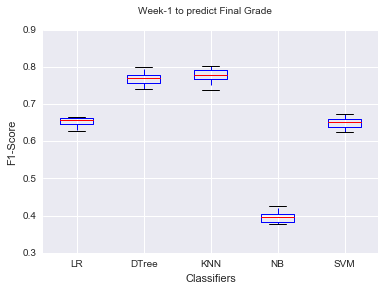

In [63]:
fig = plt.figure()
fig.suptitle('Week-1 to predict Final Grade')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("F1-Score")
plt.xlabel("Classifiers")
ax.set_xticklabels(names)
plt.show()

In [58]:
# Make predictions on validation dataset
# -*- coding: utf-8 -*-
print("Decision Tree")
LR = DecisionTreeClassifier()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



Decision Tree
0.767233238905
[[ 516  345]
 [ 148 1109]]
             precision    recall  f1-score   support

    Engaged       0.78      0.60      0.68       861
 NotEngaged       0.76      0.88      0.82      1257

avg / total       0.77      0.77      0.76      2118



In [59]:
print("GaussianNB")
LR = GaussianNB()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


GaussianNB
0.408404154863
[[ 861    0]
 [1253    4]]
             precision    recall  f1-score   support

    Engaged       0.41      1.00      0.58       861
 NotEngaged       1.00      0.00      0.01      1257

avg / total       0.76      0.41      0.24      2118



In [60]:
print("KNeighbors")
LR = KNeighborsClassifier()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


KNeighbors
0.761567516525
[[ 500  361]
 [ 144 1113]]
             precision    recall  f1-score   support

    Engaged       0.78      0.58      0.66       861
 NotEngaged       0.76      0.89      0.82      1257

avg / total       0.76      0.76      0.75      2118



In [61]:
print("LogisticRegression")
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


LogisticRegression
0.663833805477
[[654 207]
 [505 752]]
             precision    recall  f1-score   support

    Engaged       0.56      0.76      0.65       861
 NotEngaged       0.78      0.60      0.68      1257

avg / total       0.69      0.66      0.67      2118



In [62]:
print("Support Vector Machine")
LR = SVC()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Support Vector Machine
0.652030217186
[[629 232]
 [505 752]]
             precision    recall  f1-score   support

    Engaged       0.55      0.73      0.63       861
 NotEngaged       0.76      0.60      0.67      1257

avg / total       0.68      0.65      0.65      2118

